In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/Users/hayden/Downloads/Projects/used_car_project/data/cleaned/used_cars_cleaned.csv")
df.head()

,brand,model,mileage,fuel_type,engine,ext_col,int_col,accident,clean_title,price,mile_bin,car_age,price_per_mile,ext_col_grouped
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Black,Black,1.0,1,10300.0,40k-60k,12,0.201961,Black
1,Hyundai,Palisade SEL,34742,Gasoline,3.8L V6 24V GDI DOHC,Moonlight Cloud,Gray,1.0,1,38005.0,20k-40k,4,1.093921,other
2,Lexus,RX 350 RX 350,22372,Gasoline,3.5 Liter DOHC,Blue,Black,0.0,0,54598.0,20k-40k,3,2.440461,Blue
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Black,Black,0.0,1,15500.0,80k-100k,10,0.174353,Black
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,Glacier White Metallic,Black,0.0,0,34999.0,0-20k,4,3.558617,other


# Histogram of Prices

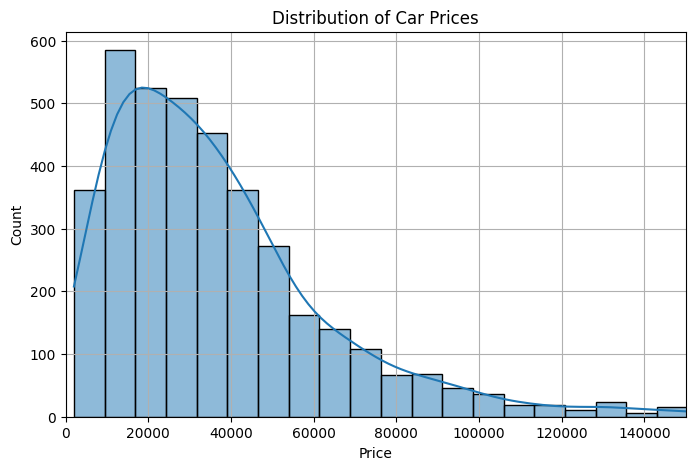

In [98]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=40, kde=True)
plt.xlim(0, 150000)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Scatterplot of Mileages

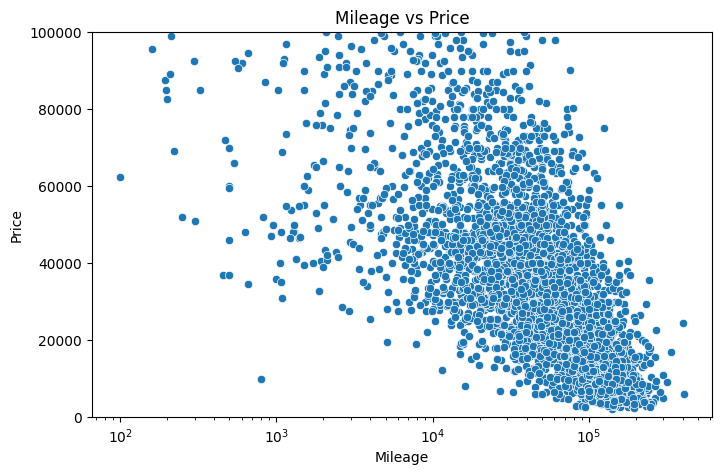

In [99]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = df, x = 'mileage', y = 'price') ## What is KDE?
plt.ylim(0, 100000)
plt.title('Mileage vs Price')
plt.xscale('log')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Distribution of Car Brands

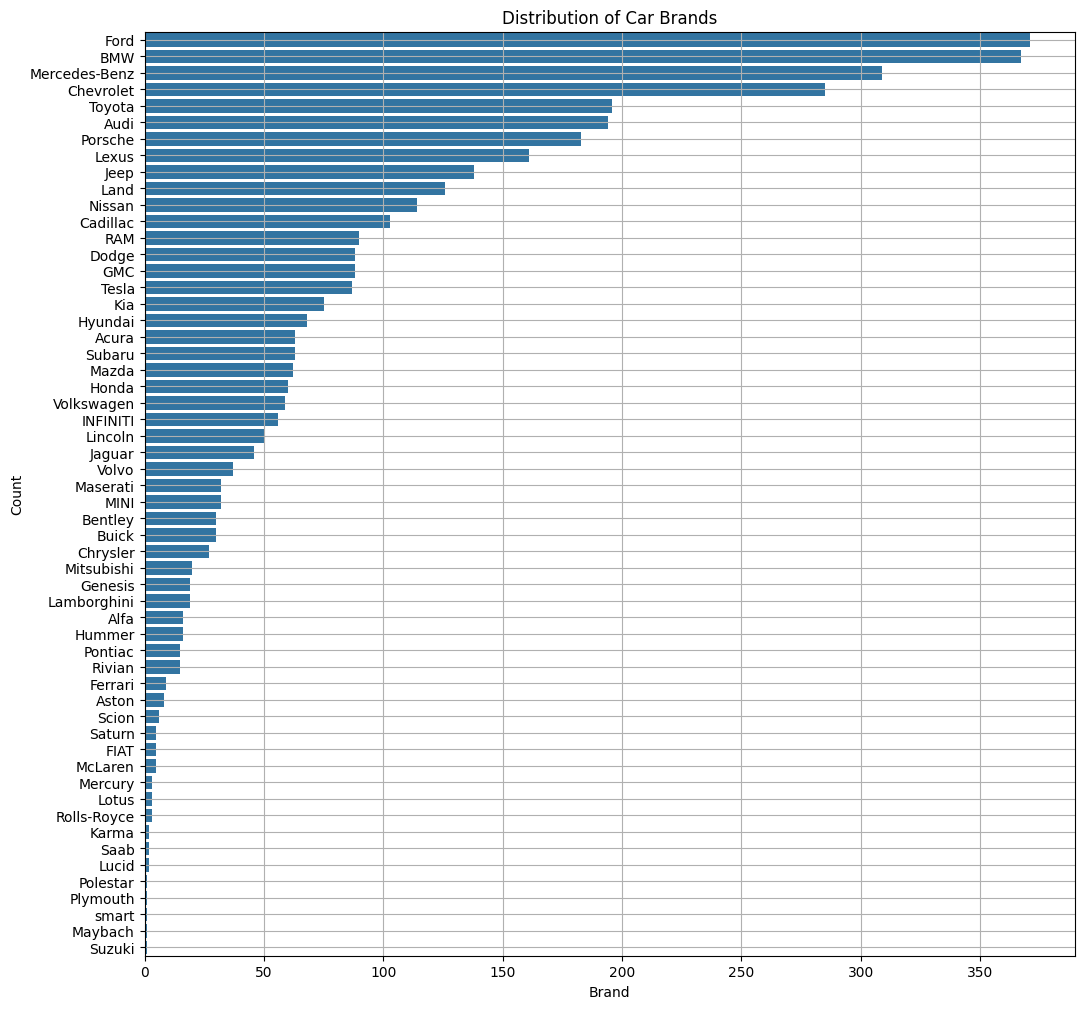

In [109]:
plt.figure(figsize=(12,12))
sns.countplot(df['brand'], order= df['brand'].value_counts().index)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Mileage vs Price
    mileage in range since mileage vs price above didn't show any significant result

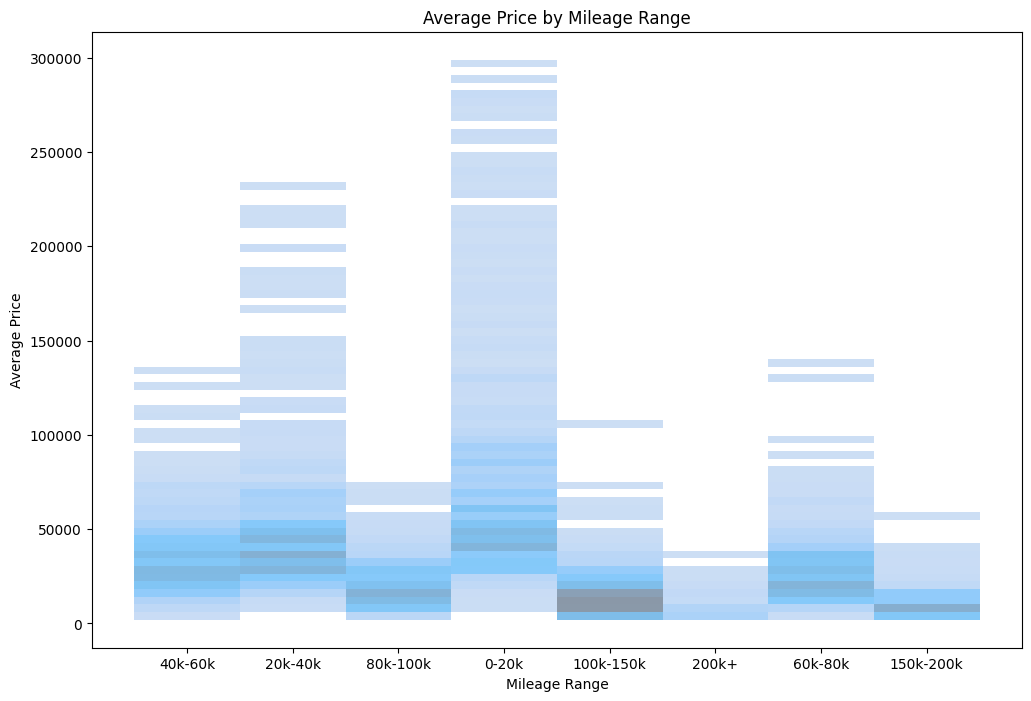

In [110]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='mile_bin', y='price', alpha=0.6)
plt.title('Average Price by Mileage Range')
plt.xlabel('Mileage Range')
plt.ylabel('Average Price')
plt.show()

# Box plot for accident history
    Shows that on average cars with no accidents are priced higher than those with accidents.

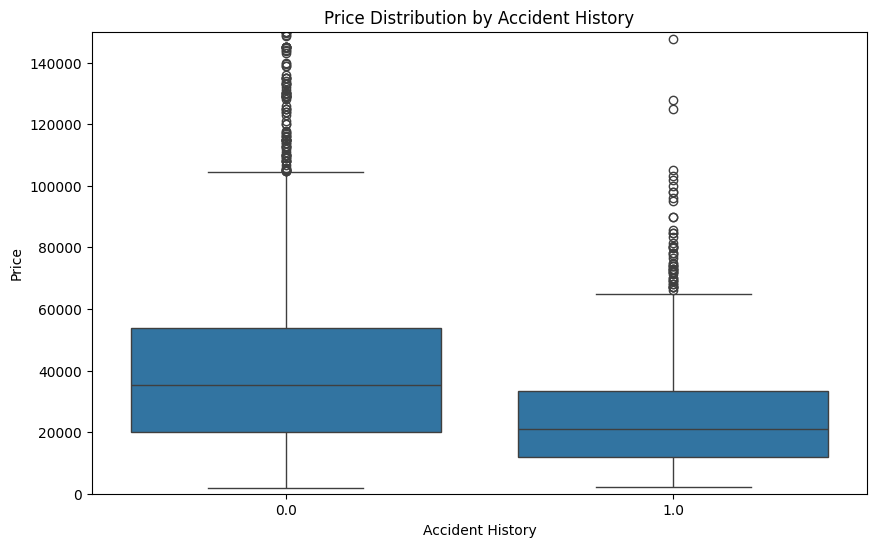

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='accident', y='price')
plt.ylim(0, 150000)
plt.title('Price Distribution by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Price')
plt.show()

# Average price by maker

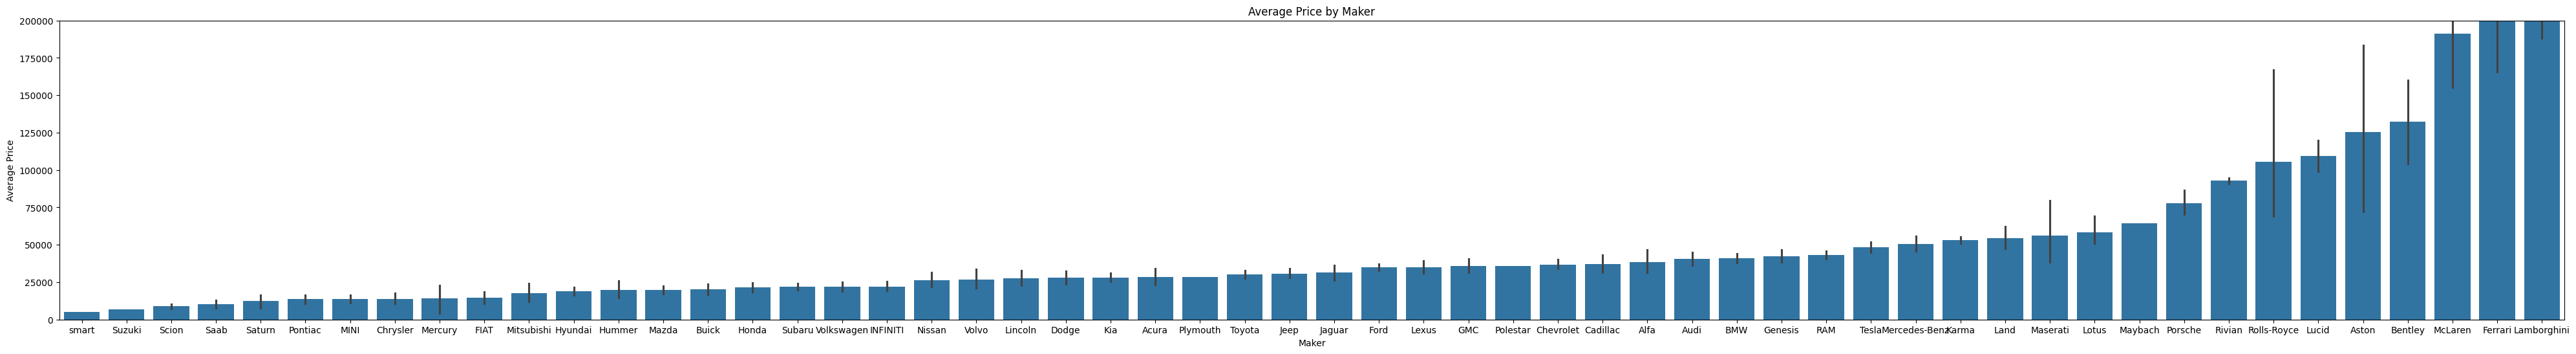

In [112]:
plt.figure(figsize=(50, 6))
sns.barplot(data=df, x='brand', y='price', estimator='mean', order= df.groupby('brand')['price'].mean().sort_values(ascending=True).index)
plt.ylim(0, 200000)
plt.title('Average Price by Maker')
plt.xlabel('Maker')
plt.ylabel('Average Price')
plt.show()

# Car age vs Price

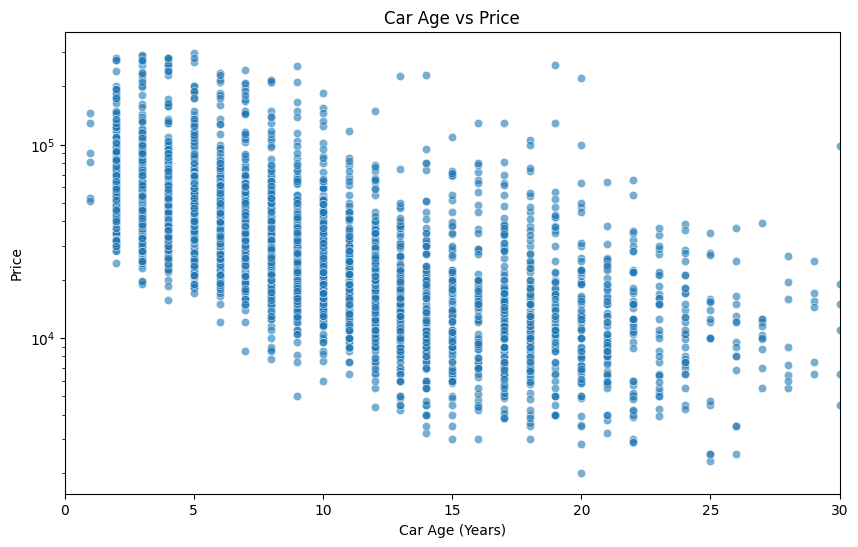

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='car_age', y='price', alpha=0.6)
plt.title('Car Age vs Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price')
#plt.xscale('log')  # Log scale for better visibility
plt.yscale('log')  # Log scale for better visibility
plt.xlim(0,30)
plt.show()

# Car price by fuel type

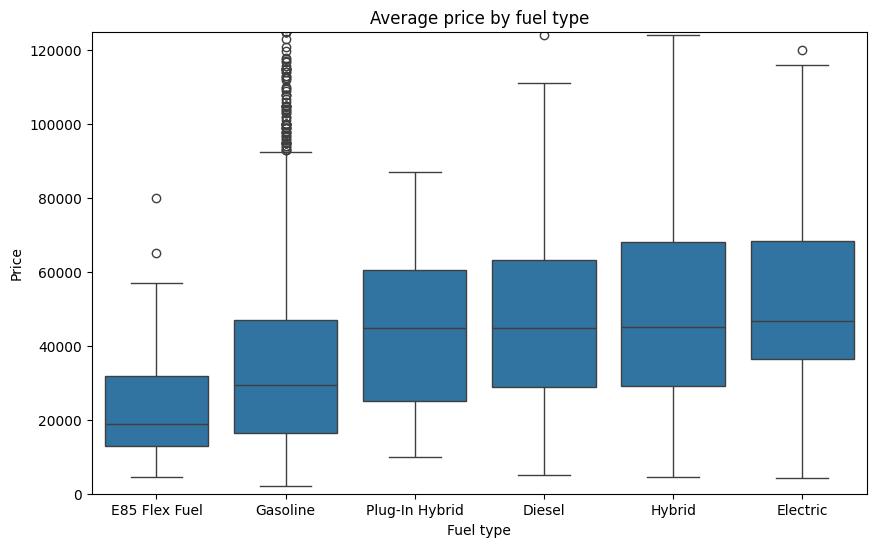

In [114]:
plt.figure(figsize = (10,6))

sns.boxplot(data = df, x = df['fuel_type'], y = 'price', order = df[~df['fuel_type'].isin(["–", "not supported"])].groupby('fuel_type')['price'].mean().sort_values().index)

plt.title('Average price by fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.ylim(0,125000)
plt.show()

# Car price by exterior color

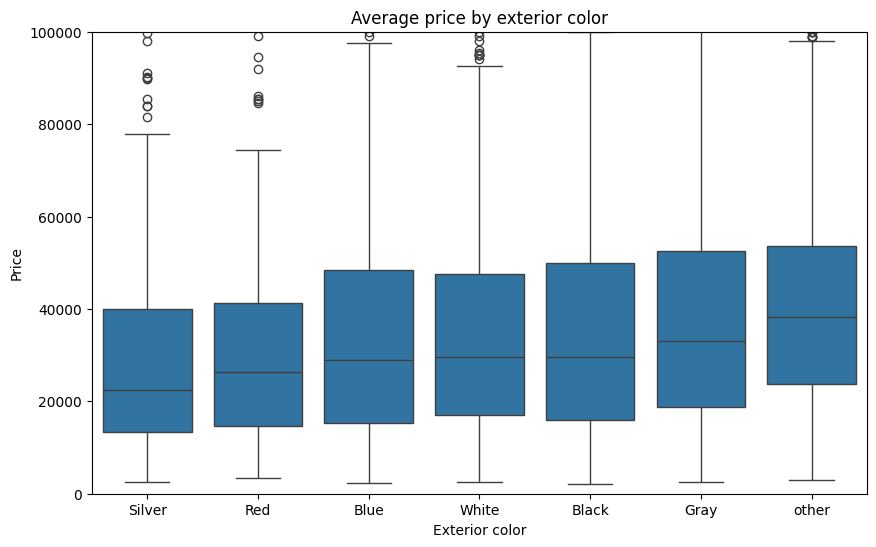

In [115]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'ext_col_grouped', y = 'price', order = df.groupby('ext_col_grouped')['price'].mean().sort_values(ascending=True).index)
plt.title('Average price by exterior color')
plt.xlabel('Exterior color')
plt.ylabel('Price')
plt.ylim(0,100000)
plt.show()

# Car price by clean title

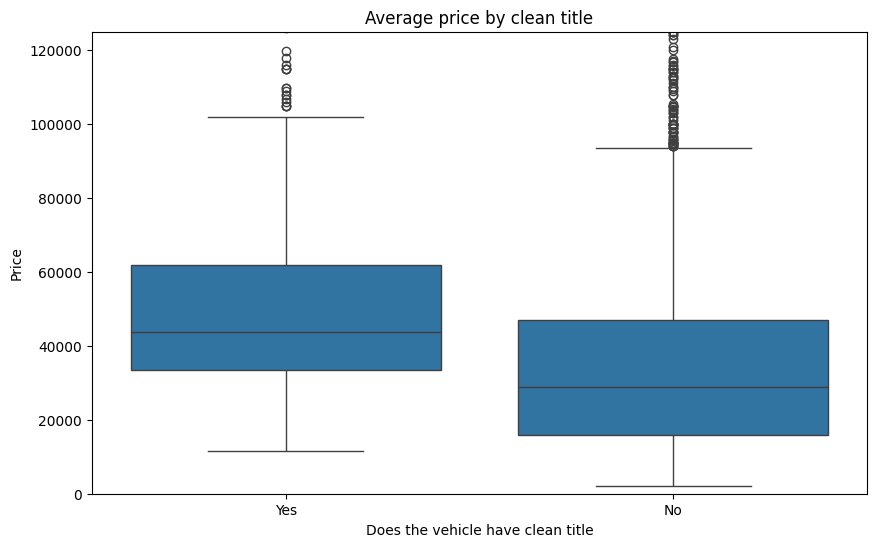

In [116]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'clean_title', y = 'price')
plt.title('Average price by clean title')
plt.xticks(ticks = [0,1], labels=['Yes', 'No'])
plt.xlabel('Does the vehicle have clean title')
plt.ylabel('Price')
plt.ylim(0,125000)
plt.show()

# Heatmap

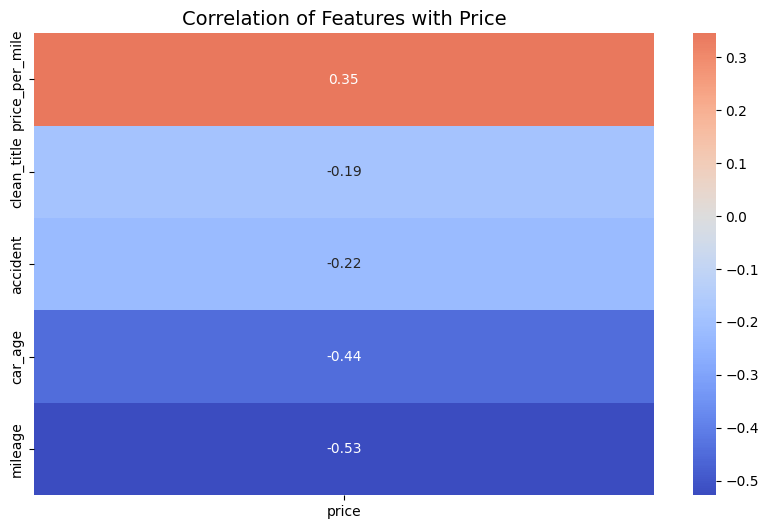

In [117]:
corr = df.corr(numeric_only=True)
price_corr = corr[['price']].drop('price')
# --- Focus on price & price_per_mile correlations ---
plt.figure(figsize=(10,6))
sns.heatmap(
    price_corr.sort_values(by='price', ascending=False),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation of Features with Price", fontsize=14)
plt.show()